In [14]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [4]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
# Альтернативный метод векторизовать данные
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

W0924 11:44:09.357105  5956 deprecation_wrapper.py:119] From C:\Users\a.lunev\Anaconda3\envs\ML\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 11:44:09.389094  5956 deprecation_wrapper.py:119] From C:\Users\a.lunev\Anaconda3\envs\ML\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 11:44:09.396108  5956 deprecation_wrapper.py:119] From C:\Users\a.lunev\Anaconda3\envs\ML\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0924 11:44:09.484096  5956 deprecation_wrapper.py:119] From C:\Users\a.lunev\Anaconda3\envs\ML\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0924 11:44:09.527094  5956 deprecation_

In [17]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 229us/step - loss: 0.1055 - acc: 0.9575 - val_loss: 1.1033 - val_acc: 0.7990
Epoch 2/9
7982/7982 [==============================] - 2s 254us/step - loss: 0.1019 - acc: 0.9579 - val_loss: 1.1133 - val_acc: 0.8020
Epoch 3/9
7982/7982 [==============================] - 2s 244us/step - loss: 0.1028 - acc: 0.9592 - val_loss: 1.0965 - val_acc: 0.7960
Epoch 4/9
7982/7982 [==============================] - 2s 215us/step - loss: 0.1030 - acc: 0.9575 - val_loss: 1.1221 - val_acc: 0.7970
Epoch 5/9
7982/7982 [==============================] - 2s 212us/step - loss: 0.0970 - acc: 0.9590 - val_loss: 1.1496 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 2s 261us/step - loss: 0.0988 - acc: 0.9565 - val_loss: 1.2267 - val_acc: 0.7870
Epoch 7/9
7982/7982 [==============================] - 2s 214us/step - loss: 0.0960 - acc: 0.9575 - val_loss: 1.1766 - val_acc: 0.7990
Epoch 8

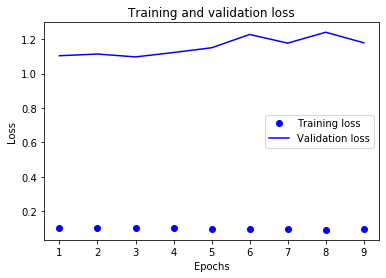

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

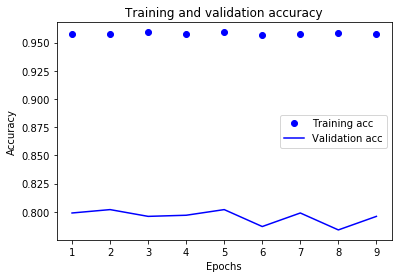

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 192us/step


[1.3464757742249105, 0.7796081923950174]

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0]

array([1.13866838e-06, 9.05850300e-07, 1.09319809e-09, 9.59693968e-01,
       3.31416763e-02, 1.09717686e-10, 8.07376666e-11, 5.54451981e-06,
       1.76339381e-04, 7.37280232e-07, 4.24511063e-06, 2.91883800e-04,
       2.69567263e-05, 3.44734758e-07, 1.13270758e-07, 4.61118210e-09,
       3.92252492e-04, 4.98006500e-07, 5.75993681e-06, 1.16806703e-04,
       5.73063781e-03, 3.33316653e-04, 4.60054821e-07, 1.23549064e-08,
       8.64897345e-08, 2.48290206e-08, 1.57955951e-12, 1.16111934e-07,
       6.39979862e-06, 3.72466218e-08, 4.21593504e-05, 1.97367386e-10,
       8.97727932e-06, 5.14797316e-09, 4.62761273e-06, 7.78810403e-08,
       1.36629842e-05, 2.81590165e-08, 4.76915432e-07, 8.30421676e-10,
       9.12736837e-08, 5.40048930e-08, 3.40858044e-08, 1.92966909e-09,
       1.06590535e-11, 9.47587980e-11], dtype=float32)